### **Storing Metadata in Graphs: NetworkX vs RDF Triples**

When working with knowledge graphs, it’s not enough to store just nodes and edges — you often need to attach additional information to those nodes and relationships. This extra information is called **metadata** (e.g., difficulty level, descriptions, weights).

Two common ways to store metadata are:

* **Using NetworkX in Python**
* **Using RDF Triples in Semantic Web systems**


### **1. NetworkX Approach**

NetworkX allows metadata to be stored directly in a graph using **Python dictionaries**. Each node and edge can have any number of attributes.

#### Example:

```python
topics = {
    'python_basics': {
        'difficulty': 'beginner',
        'description': 'Basic Python concepts'
    }
}
```

### Key Characteristics:

* Uses flexible key-value pairs
* You can quickly add, update, or delete attributes
* However, it's not standardized — every developer might structure it differently
* Limited to Python; not easily shareable across different tools or platforms

### Hands-on: Representing Metadata with NetworkX


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define nodes with metadata
topics = {
    'python_basics': {'difficulty': 'beginner', 'description': 'Basic Python concepts'},
    'data_structures': {'difficulty': 'intermediate', 'description': 'Python data structures'},
    'advanced_python': {'difficulty': 'advanced', 'description': 'Advanced Python concepts'},
    'machine_learning': {'difficulty': 'advanced', 'description': 'Machine Learning with Python'},
    'bioimage_analysis': {'difficulty': 'advanced', 'description': 'Bioimage Analysis with Python'}
}

# Add nodes and attributes to the graph
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)

# Define relationships with weights
relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    ('advanced_python', 'bioimage_analysis', {'weight': 0.7})
]

# Add edges to the graph
G.add_edges_from(relationships)

In [2]:
print(G.nodes())             # All nodes
print(G.edges())             # All edges

['python_basics', 'data_structures', 'advanced_python', 'machine_learning', 'bioimage_analysis']
[('python_basics', 'data_structures'), ('data_structures', 'advanced_python'), ('advanced_python', 'machine_learning'), ('advanced_python', 'bioimage_analysis')]


In [3]:
print(G.nodes(data=True))             # All nodes
print(G.edges(data=True))             # All edges

[('python_basics', {'difficulty': 'beginner', 'description': 'Basic Python concepts'}), ('data_structures', {'difficulty': 'intermediate', 'description': 'Python data structures'}), ('advanced_python', {'difficulty': 'advanced', 'description': 'Advanced Python concepts'}), ('machine_learning', {'difficulty': 'advanced', 'description': 'Machine Learning with Python'}), ('bioimage_analysis', {'difficulty': 'advanced', 'description': 'Bioimage Analysis with Python'})]
[('python_basics', 'data_structures', {'weight': 1.0}), ('data_structures', 'advanced_python', {'weight': 0.8}), ('advanced_python', 'machine_learning', {'weight': 0.7}), ('advanced_python', 'bioimage_analysis', {'weight': 0.7})]


#### **Query: Shortest path from python_basics to bioimage_analysis**

In [4]:
# Query: Shortest path from python_basics to bioimage_analysis
shortest_path = nx.shortest_path(G, source='python_basics', target='bioimage_analysis')
print("Shortest Path:", " -> ".join(shortest_path))

Shortest Path: python_basics -> data_structures -> advanced_python -> bioimage_analysis


### Visualize the Graph


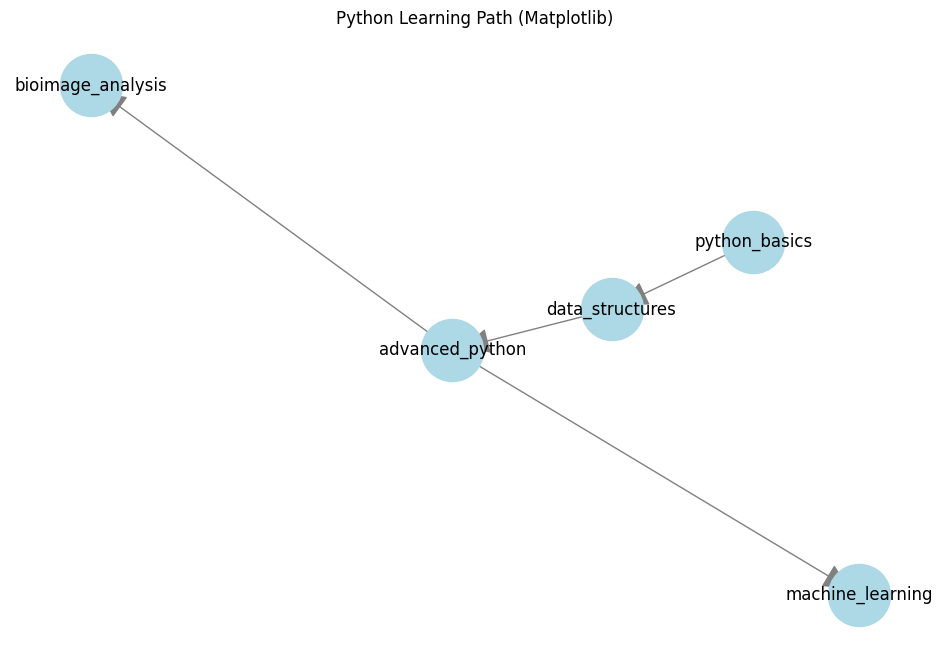

In [6]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=40)
plt.title("Python Learning Path (Matplotlib)")
plt.axis('off')
plt.show()

### **2. RDF Triples Approach**

RDF (Resource Description Framework) is a standard model for data sharing and semantic linking. It uses **triples** of the form:

For example:

```text
(TOPIC.python_basics, PROP.difficulty, "beginner")
(TOPIC.python_basics, PROP.description, "Basic Python concepts")
```

This structure is used widely in semantic web, ontologies, and systems like **[GraphDB](https://graphdb.ontotext.com/documentation/11.0/index.html),** **[Neo4j (with RDF plugins)](https://neo4j.com/docs/)**, **Amazon Neptune**, and **Apache Jena**.


### Key Characteristics:

* Formal and standardized structure
* Interoperable across systems and languages
* Supports **reasoning**, **linking to external ontologies**, and **querying with SPARQL**
* However, it is more complex to learn and implement
* Ideal for large-scale, distributed, or web-based knowledge systems


### Hands-on: Representing Metadata with RDFLib

Before diving into the code, here’s what’s happening conceptually:
We will create an **RDF graph** using the `rdflib` Python library. This graph will store information as triples, where:

* **Subject** – the resource being described (e.g., a topic like `"python_basics"`)
* **Predicate** – the property of the resource (e.g., `"difficulty"`, `"requires"`)
* **Object** – the value or linked resource for that property (e.g., `"beginner"` or another topic)

To do this, we:

1. Import `Graph`, `Namespace`, `URIRef`, and `Literal` from `rdflib`.
2. Create a `Graph` instance to hold our triples.
3. Define a `Namespace` (like a “family name” for our URIs) for all resources in our domain.
4. Loop through our topic metadata to add RDF triples to the graph.
5. Define relationships between topics (including their weights) and add them as triples.

In [ ]:
from rdflib import Graph, Namespace, URIRef, Literal

from rdflib.namespace import RDF, RDFS

# Create RDF graph and namespace
g = Graph()
EX = Namespace("http://example.org/")

# Define nodes with metadata
topics = {
    'python_basics': {'difficulty': 'beginner', 'description': 'Basic Python concepts'},
    'data_structures': {'difficulty': 'intermediate', 'description': 'Python data structures'},
    'advanced_python': {'difficulty': 'advanced', 'description': 'Advanced Python concepts'},
    'machine_learning': {'difficulty': 'advanced', 'description': 'Machine Learning with Python'},
    'bioimage_analysis': {'difficulty': 'advanced', 'description': 'Bioimage Analysis with Python'}
}

# Add topics and metadata to RDF graph
for topic, metadata in topics.items():
    topic_uri = EX[topic]

    # Add a triple stating: "topic_uri has a label of <topic name>"
    # RDFS.label is a standard RDF property for human-readable names
    g.add((topic_uri, RDFS.label, Literal(topic)))

    # Add a triple stating: "topic_uri has a difficulty level of <difficulty>"
    # EX.difficulty is our custom property for difficulty levels
    g.add((topic_uri, EX.difficulty, Literal(metadata['difficulty'])))

     # Add a triple stating: "topic_uri has a description of <description>"
    # EX.description is our custom property for textual descriptions
    g.add((topic_uri, EX.description, Literal(metadata['description'])))

### Let's explain the above code and why it is the way it is, but first, let's print the result.


In [17]:
print("Triples in the RDF graph:\n")
for subj, pred, obj in g:
    print(f"Subject: {subj}")
    print(f"Predicate: {pred}")
    print(f"Object: {obj}")

Triples in the RDF graph:

Subject: http://example.org/advanced_python
Predicate: http://example.org/description
Object: Advanced Python concepts
Subject: http://example.org/advanced_python
Predicate: http://www.w3.org/2000/01/rdf-schema#label
Object: advanced_python
Subject: http://example.org/data_structures
Predicate: http://example.org/description
Object: Python data structures
Subject: http://example.org/advanced_python
Predicate: http://example.org/difficulty
Object: advanced
Subject: http://example.org/machine_learning
Predicate: http://example.org/description
Object: Machine Learning with Python
Subject: http://example.org/bioimage_analysis
Predicate: http://www.w3.org/2000/01/rdf-schema#label
Object: bioimage_analysis
Subject: http://example.org/bioimage_analysis
Predicate: http://example.org/difficulty
Object: advanced
Subject: http://example.org/bioimage_analysis
Predicate: http://example.org/description
Object: Bioimage Analysis with Python
Subject: http://example.org/pytho

**Step 1 – Concept table (simplified view)**
Think of RDF triples like rows in a table:

| Subject        | Predicate   | Object                  |
| -------------- | ----------- | ----------------------- |
| python\_basics | label       | "python\_basics"        |
| python\_basics | difficulty  | "beginner"              |
| python\_basics | description | "Basic Python concepts" |

Here,

* **Subject** = the thing we’re talking about (`python_basics`)
* **Predicate** = the property/relationship (`label`, `difficulty`, `description`)
* **Object** = the value or another resource

**Step 2 – How it looks in actual RDF output (full URIs)**
When stored in an RDF graph, these identifiers usually become full URLs for clarity and uniqueness:

```
Subject: http://example.org/advanced_python
Predicate: http://example.org/description
Object: Advanced Python concepts

Subject: http://example.org/advanced_python
Predicate: http://www.w3.org/2000/01/rdf-schema#label
Object: advanced_python

Subject: http://example.org/advanced_python
Predicate: http://example.org/difficulty
Object: advanced
```

The meaning is **exactly the same** as the table above — the only difference is that RDF prefers globally unique identifiers (URIs) instead of plain words, so no two datasets accidentally collide.

In [ ]:
relationships_with_weights = [
    ('python_basics', 'data_structures', 1.0),
    ('data_structures', 'advanced_python', 0.8),
    ('advanced_python', 'machine_learning', 0.7),
    ('advanced_python', 'bioimage_analysis', 0.7)
]


### Add Relationships as RDF Triples


In [21]:
for src, tgt, weight in relationships_with_weights:
    g.add((EX[src], EX.requires, EX[tgt]))
    g.add((EX[src], EX[f'weight_{tgt}'], Literal(weight)))
    
    # Print human-friendly version
    print(f"{src} -- requires --> {tgt} [weight: {weight}]")

python_basics -- requires --> data_structures [weight: 1.0]
data_structures -- requires --> advanced_python [weight: 0.8]
advanced_python -- requires --> machine_learning [weight: 0.7]
advanced_python -- requires --> bioimage_analysis [weight: 0.7]


### Example Query: Retrieve Required Topics and Weights


In [ ]:
query_weights = """
PREFIX ex: <http://example.org/>
SELECT ?topic ?weight WHERE {
    ex:python_basics ex:requires ?topic .
    ex:python_basics ex:weight_data_structures ?weight .
}
"""

### **Explaining the above lines**

`ex:python_basics ex:requires ?topic .`: “Find whatever thing python_basics requires, and call that thing ?topic.”

`ex:python_basics ex:weight_data_structures ?weight .`: “Find the value of weight_data_structures for python_basics and store it in ?weight.”

In [12]:
print("Weights for topics that python_basics requires:")
for row in g.query(query_weights):
    print(f"Topic: {row.topic}, Weight: {row.weight}")    

----------------------------------------
Weights for topics that python_basics requires:
Topic: http://example.org/data_structures, Weight: 1.0


### View the RDF Graph as Turtle


In [13]:
print("\nRDF Graph (Turtle Format):")
print(g.serialize(format="turtle"))



RDF Graph (Turtle Format):
@prefix ns1: <http://example.org/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ns1:python_basics rdfs:label "python_basics" ;
    ns1:description "Basic Python concepts" ;
    ns1:difficulty "beginner" ;
    ns1:requires ns1:data_structures ;
    ns1:weight_data_structures 1e+00 .

ns1:advanced_python rdfs:label "advanced_python" ;
    ns1:description "Advanced Python concepts" ;
    ns1:difficulty "advanced" ;
    ns1:requires ns1:bioimage_analysis,
        ns1:machine_learning ;
    ns1:weight_bioimage_analysis 7e-01 ;
    ns1:weight_machine_learning 7e-01 .

ns1:bioimage_analysis rdfs:label "bioimage_analysis" ;
    ns1:description "Bioimage Analysis with Python" ;
    ns1:difficulty "advanced" .

ns1:data_structures rdfs:label "data_structures" ;
    ns1:description "Python data structures" ;
    ns1:difficulty "intermediate" ;
    ns1:requires ns1:advanced_python ;
    ns1:weight_advanced

##### **Explanation:**

* `g.serialize(format="turtle")` converts the in-memory RDF graph (`g`) into a **Turtle format string**.
* **Turtle** (Terse RDF Triple Language) is a human-friendly syntax for RDF — it’s easier to read than raw RDF/XML or N-Triples.
* This printout shows all the triples currently stored in your graph, grouped by subject, and using prefixes for brevity (like `ns1:` instead of the full URI).

**In the output you pasted:**

* **`@prefix` lines** define namespace shortcuts:

  * `ns1:` → `http://example.org/`
  * `rdfs:` → RDF Schema vocabulary (for labels, comments, etc.)
  * `xsd:` → XML Schema datatypes (for literals like numbers, dates, etc.)
* **Each block** starts with a subject (e.g., `ns1:python_basics`) followed by predicates and their objects.
* Example:

  ```turtle
  ns1:python_basics rdfs:label "python_basics" ;
      ns1:description "Basic Python concepts" ;
      ns1:difficulty "beginner" ;
      ns1:requires ns1:data_structures ;
      ns1:weight_data_structures 1e+00 .
  ```

  means:

  The thing identified by `ns1:python_basics`

     * has the label `"python_basics"`
     * has description `"Basic Python concepts"`
     * has difficulty `"beginner"`
     * requires the resource `ns1:data_structures`
     * has a weight of `1.0` for `data_structures`.

### **Conclusion**

In the above notebook, we've explored how to build, enrich, analyze, and represent knowledge graphs using both **NetworkX** and **RDF triples**.

We began with the Pythonic approach using NetworkX, leveraging intuitive data structures like dictionaries to store metadata and relationships. This approach is ideal for fast prototyping, algorithm experimentation, and visualization within Python.

Then, we introduced **RDF triples**, a more formal and standardized way to represent knowledge. Using the **Turtle format**, we expressed metadata and relationships using a subject-predicate-object structure. This enables interoperability, semantic reasoning, and integration with web-based knowledge systems.

The final RDF graph captures not only the relationships between topics but also descriptive metadata and weights, all expressed using compact, readable prefixes. This structure lays the foundation for **semantic search**, **linked data**, and **ontology-driven AI systems**.

### **Complete KG playlist:**
[**DigitalSreeni YouTube Playlist**](https://youtube.com/playlist?list=PLZsOBAyNTZwacEFVI8yo5o-1rZasRqm18&si=l_6g-_QmIud5h1Kk) – for providing an excellent set of biomedical imaging tutorials that were used in the recommender system example.
